# Exploratory data analysis Class assignment Credit information analysis
## Name: Nguyen Anh Hoang Phuc

## Problem 1

** What kind of company is Home Credit?**
- Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

- The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

- Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

** What is expected in this competition?**
- In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

**What are the benefits companies can gain by predicting this?**
- This will help them unlock the full potential of their data. And also will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.



## Problem 2

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
credit = pd.read_csv("application_train.csv")

In [3]:
credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
credit.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
credit.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [7]:
print("Check for missing values")

Check for missing values


In [8]:
def missing_value(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_value(credit).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [10]:
print("Number of columns with missing values or data")
credit.isnull().any(axis=0).sum()

Number of columns with missing values or data


67

In [11]:
print("Number of rows with missing values or data")
credit.isnull().any(axis=1).sum()

Number of rows with missing values or data


298909

In [12]:
print("Draw a graph showing the percentage of classes")
X = credit.drop(['TARGET'], axis=1)
y  = credit.loc[:, 'TARGET']

y.value_counts()

Draw a graph showing the percentage of classes


0    282686
1     24825
Name: TARGET, dtype: int64

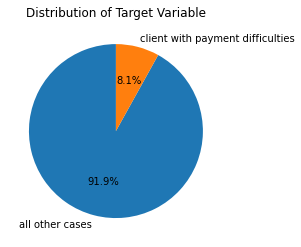

In [13]:
label_counts = y.value_counts()
labels = 'all other cases', 'client with payment difficulties'

plt.title("Distribution of Target Variable")
plt.pie(label_counts, labels=labels, autopct='%.1f%%', startangle=90)
plt.show()

- Target 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample 
- Target 0 - all other cases

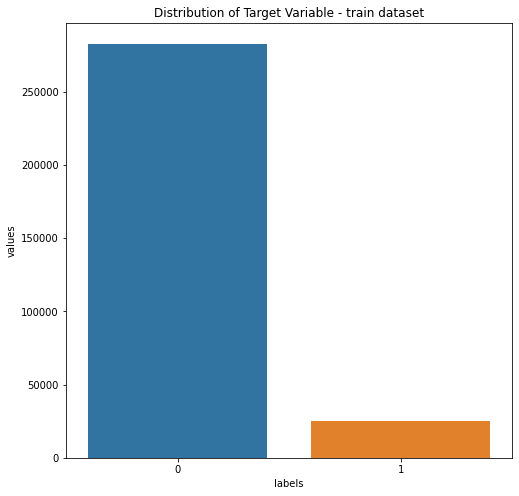

In [14]:
viz_count = credit["TARGET"].value_counts()
viz = pd.DataFrame({'labels': viz_count.index,
                   'values': viz_count.values
                  })
plt.figure(figsize = (8,8))
plt.title('Distribution of Target Variable - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y='values', data=viz)
locs, labels = plt.xticks()
plt.show()

## Problem 3

**Please set multiple issues / questions of your own based on the overview of the data.**

1. What is the clients gender?
2. Does the client own a car?
3. How many children the client has?
4. Did client provide email?
5. Did client provide home phone?
6. What kind of occupation does the client have?
7. How many family members does client have?
8. On which day of the week did the client apply for the loan?
9. Who was accompanying client when he was applying for the loan?
10. What is the Educational Level of the clients?

## Problem 4

In [15]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = credit[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = credit[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

- What is the clients gender?

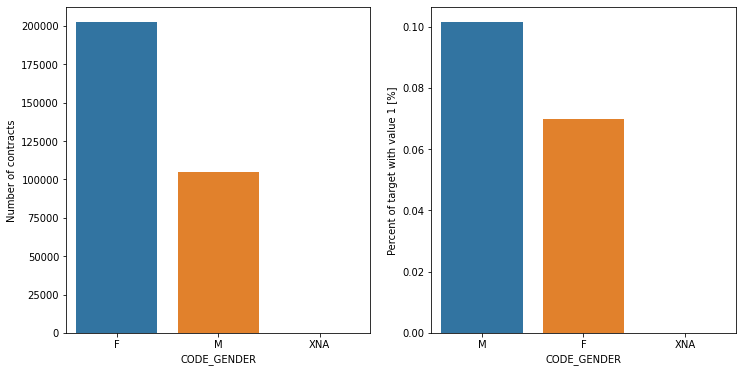

In [16]:
plot_stats('CODE_GENDER')

- Does the client own a car?

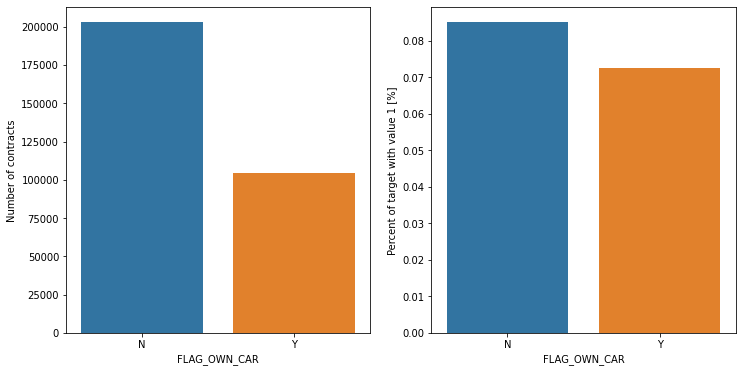

In [17]:
plot_stats('FLAG_OWN_CAR')

- How many children the client has?

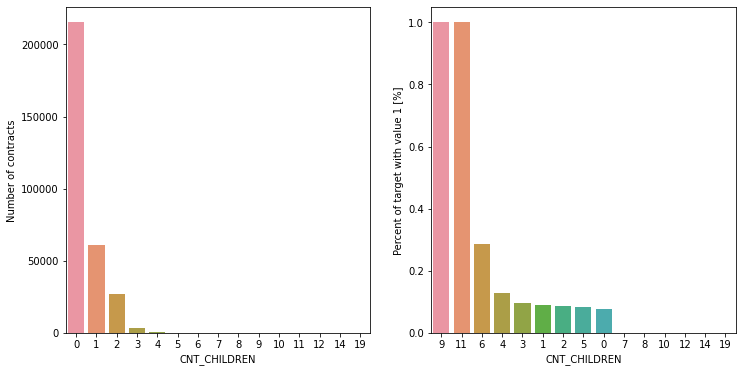

In [18]:
plot_stats('CNT_CHILDREN')

- Did client provide email?

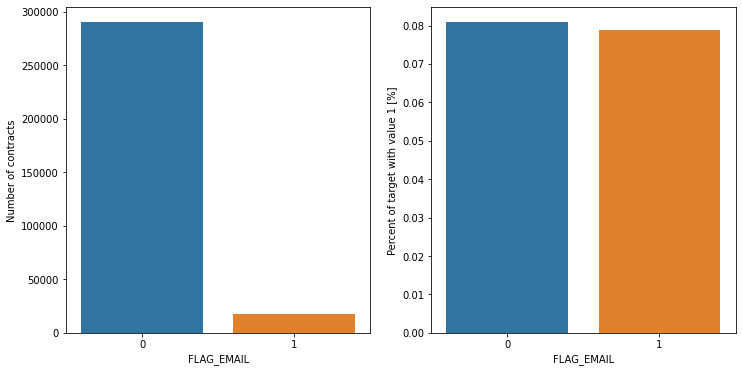

In [19]:
plot_stats('FLAG_EMAIL')

- Did client provide home phone?

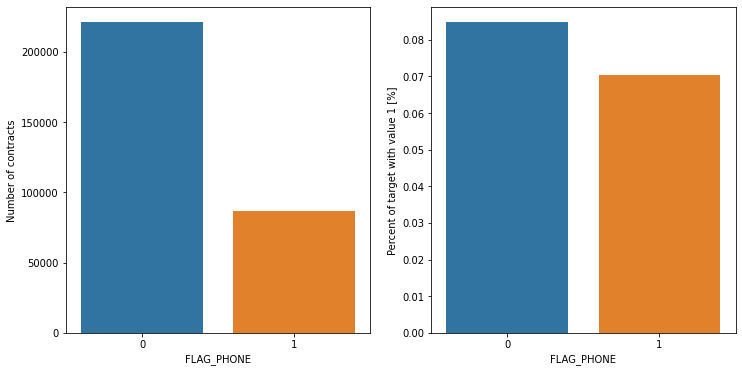

In [20]:
plot_stats('FLAG_PHONE')

- What kind of occupation does the client have?

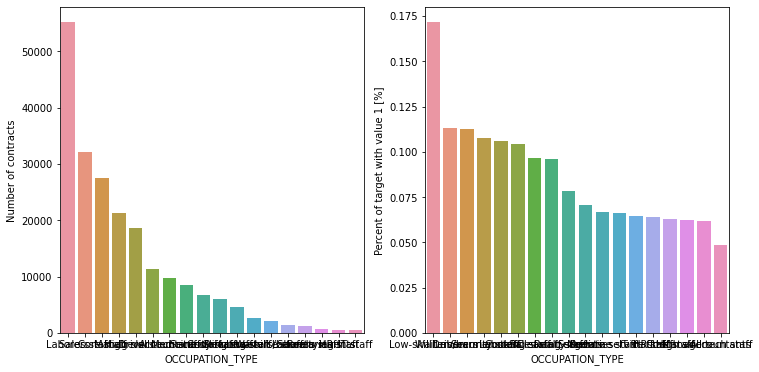

In [21]:
plot_stats('OCCUPATION_TYPE')

- How many family members does client have?

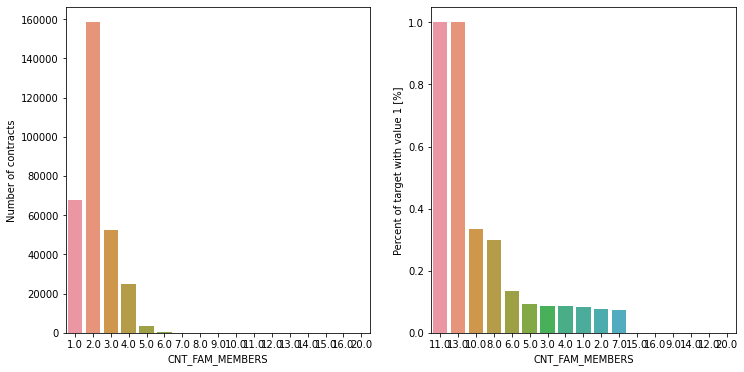

In [22]:
plot_stats('CNT_FAM_MEMBERS')

- On which day of the week did the client apply for the loan?

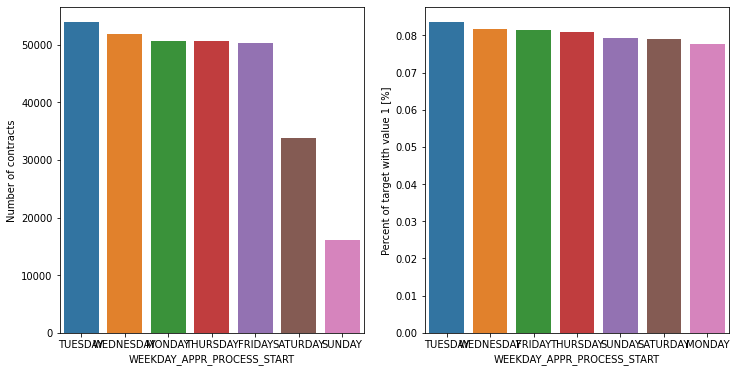

In [23]:
plot_stats('WEEKDAY_APPR_PROCESS_START')

- Who was accompanying client when he was applying for the loan?

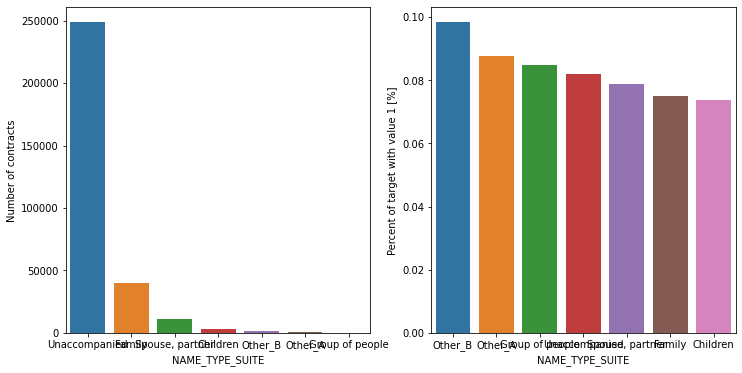

In [24]:
plot_stats('NAME_TYPE_SUITE')

- What is the Educational Level of the clients?

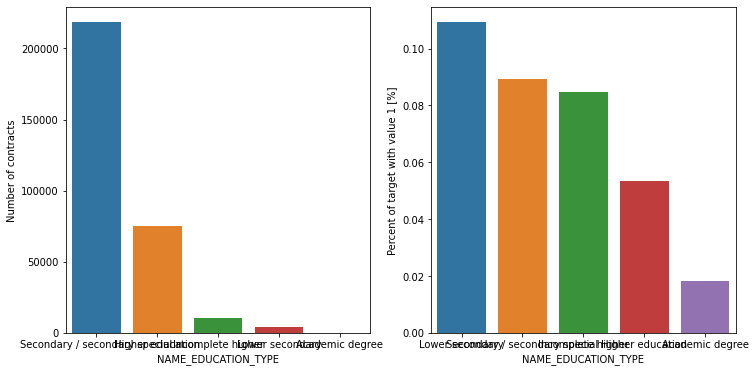

In [26]:
plot_stats('NAME_EDUCATION_TYPE')